In [1]:
%load_ext autoreload
%autoreload 2
import sys
import yaml
sys.path.append('../src')
from experiments.experiment_utils import ExperimentPipeline
from tsvae.utils.logger_utils import get_console_logger
logger = get_console_logger(__name__)
from tsvae.utils.visualization_utils import visualize_data_2d, visualize_real_recon_fake_2d
import matplotlib.pyplot as plt
import torch
from tsvae.dataset.base import DatasetOutput
from evaluations.hyperparameter import ModelEvaluator

## Gaussian Mixture

In [2]:
base_output_dir = '..' 
new_config = {'epochs' : 500, 'wandb': False, 'comment': 'test', 'beta': 0.6}

exp_config_path = '../configs/toy2d/GM.yaml'

with open(exp_config_path) as file:
    exp_config = dict(yaml.safe_load(file))
# exp_ppl = ExperimentPipeline(exp_config,base_output_dir,new_config)
# exp_ppl.train()

/Users/hous/Github/TimeCausalVAE/notebooks/../src/tsvae/models/base.py:65: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_weights = torch.load(path_to_model_weights, ma

Compare real recon fake


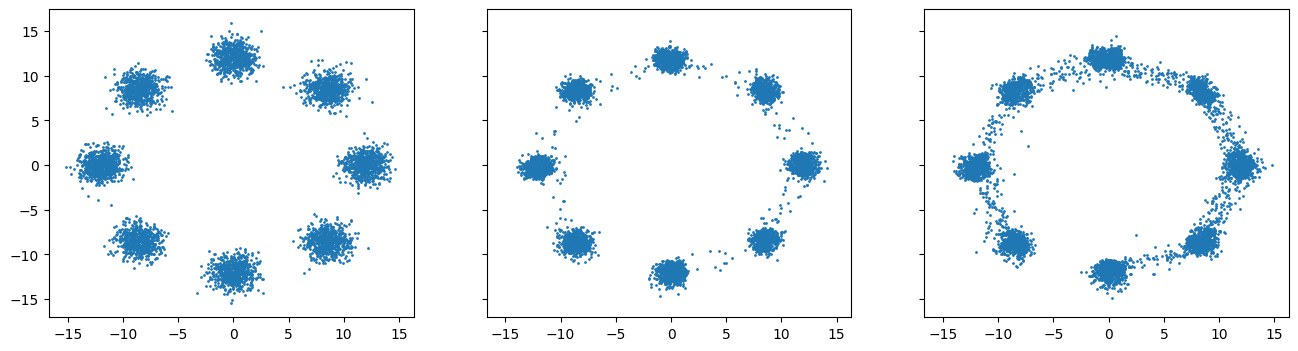

Compare real recon fake (latent representation)


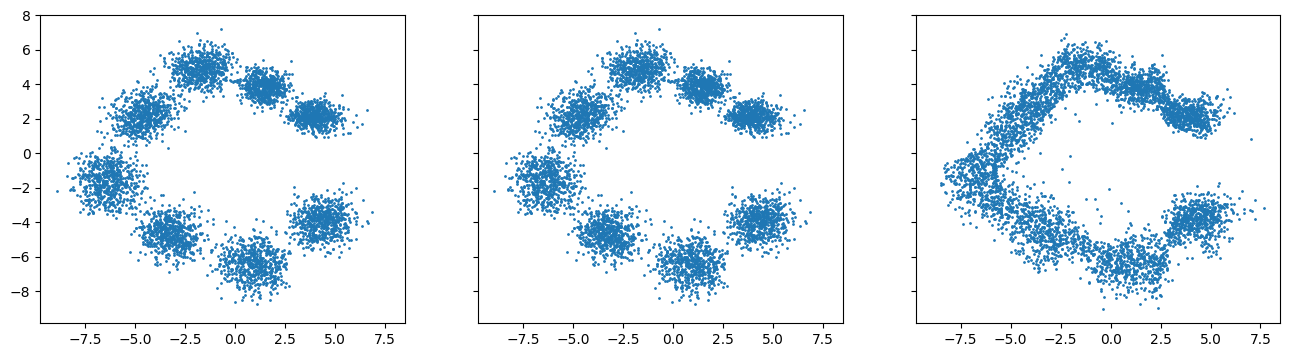

In [3]:
def evaluate(model_dir):
    model_evaluator = ModelEvaluator(model_dir)
    model_evaluator.load_model()
    model = model_evaluator.model

    n_sample_test = 5000
    exp_config = model_evaluator.exp_config
    exp_config.n_sample = n_sample_test
    _, test_dataset = model_evaluator.data_ppl(exp_config)

    dataset_output = DatasetOutput(data=test_dataset.data, labels=test_dataset.labels)
    real_data = dataset_output["data"]
    with torch.no_grad():
        model_output = model(dataset_output)
        recon_data = model_output["recon_x"]
        z_real = model_output["z"]
        z_fake = model.prior.sample(n_sample_test, device = 'cpu')
        fake_data = model.generation(n_sample_test, c=dataset_output["labels"][:n_sample_test])

    print('Compare real recon fake')    
    fig = visualize_real_recon_fake_2d(real_data, recon_data, fake_data)
    plt.show()

    print('Compare real recon fake (latent representation)')  
    fig = visualize_real_recon_fake_2d(z_real, z_real, z_fake)  
    plt.show()

model_dir = '../trained_models/GM_timestep_1/model_BetaCVAE_De_CMLP_En_CMLP_Prior_RealNVP_Con_Id_Dis_None_comment_test/BetaCVAE_training_2024-11-01_10-15-24/final_model'
evaluate(model_dir)


# Board

In [4]:
base_output_dir = '..' 
new_config = {'epochs' : 500, 'wandb': False, 'comment': 'test', 'beta': 0.5}

exp_config_path = '../configs/toy2d/Board.yaml'

with open(exp_config_path) as file:
    exp_config = dict(yaml.safe_load(file))
# exp_ppl = ExperimentPipeline(exp_config,base_output_dir,new_config)
# exp_ppl.train()

/Users/hous/Github/TimeCausalVAE/notebooks/../src/tsvae/models/base.py:65: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_weights = torch.load(path_to_model_weights, ma

rescale data with 1.0x on X-axis  and 1.0x Y-axis.
rescale data with 1.0x on X-axis  and 1.0x Y-axis.
Compare real recon fake


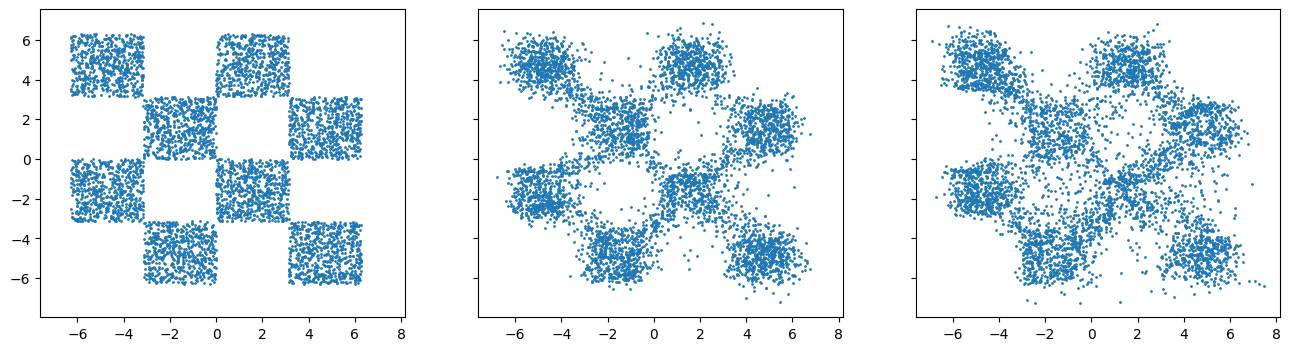

Compare real recon fake (latent representation)


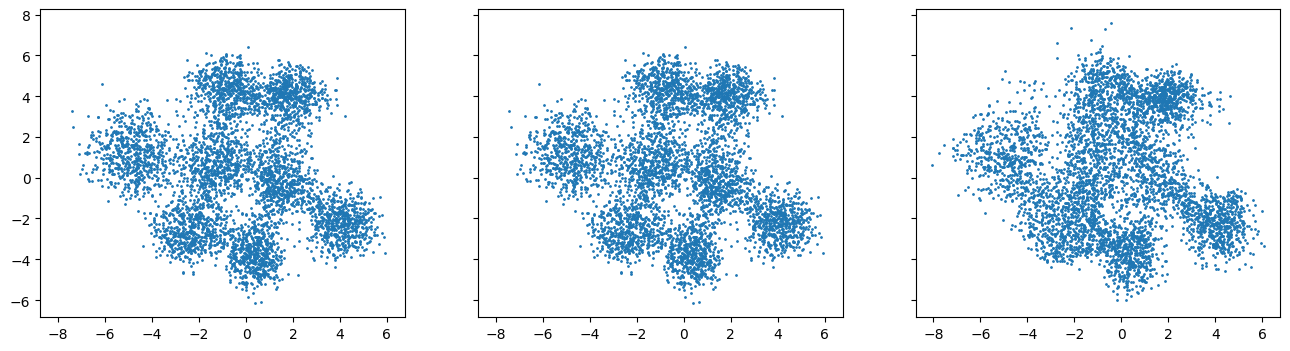

In [5]:
import torch
from tsvae.dataset.base import DatasetOutput
from evaluations.hyperparameter import ModelEvaluator


model_dir = '../trained_models/Board_timestep_1/model_BetaCVAE_De_CMLP_En_CMLP_Prior_RealNVP_Con_Id_Dis_None_comment_test/BetaCVAE_training_2024-11-01_10-24-44/final_model'
evaluate(model_dir)

# Spiral

In [6]:
base_output_dir = '..' 
new_config = {'epochs' : 500, 'wandb': False, 'comment': 'test', 'beta': 0.5}

exp_config_path = '../configs/toy2d/Spiral.yaml'

with open(exp_config_path) as file:
    exp_config = dict(yaml.safe_load(file))
# exp_ppl = ExperimentPipeline(exp_config,base_output_dir,new_config)
# exp_ppl.train()

Base dataset initialized


rescale data with 1.0x on X-axis  and 1.0x Y-axis.
rescale data with 1.0x on X-axis  and 1.0x Y-axis.
Compare real recon fake


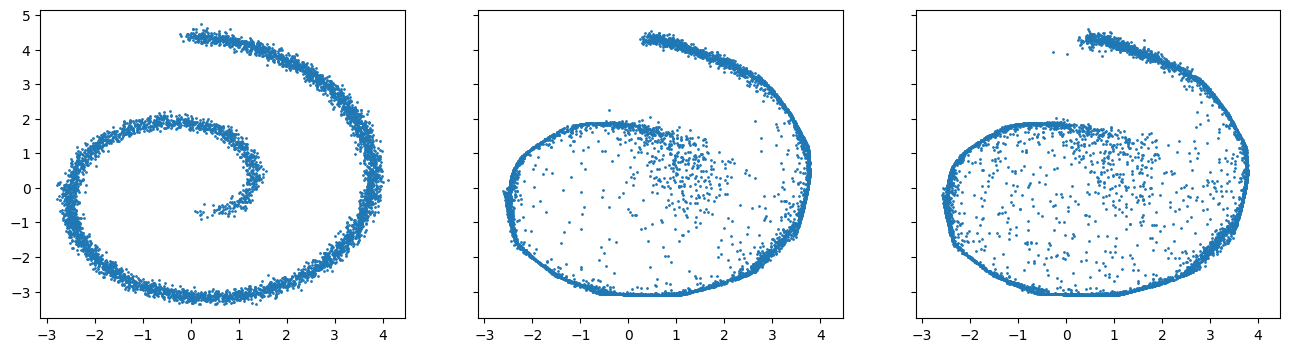

Compare real recon fake (latent representation)


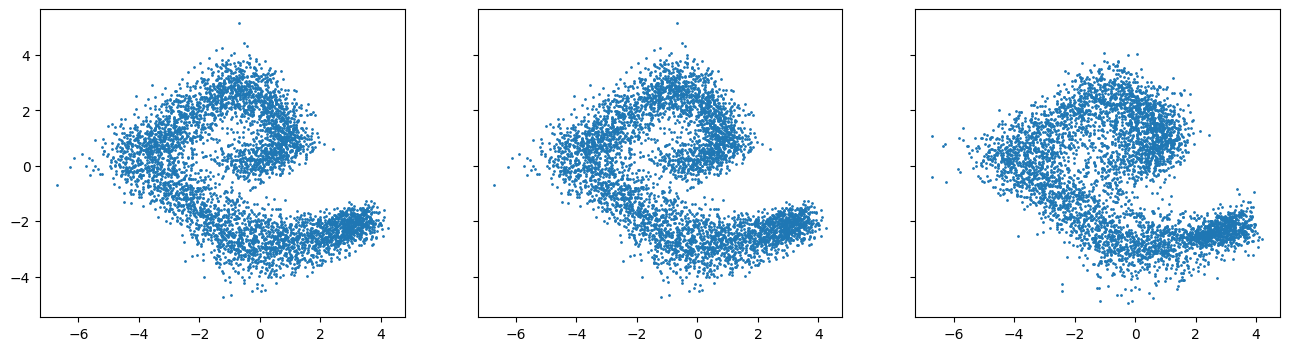

In [7]:
model_dir = '../trained_models/Spiral_timestep_1/model_BetaCVAE_De_CMLP_En_CMLP_Prior_RealNVP_Con_Id_Dis_None_comment_test/BetaCVAE_training_2024-11-01_10-29-30/final_model'
evaluate(model_dir)